In [47]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import numpy as np
from sklearn.model_selection import cross_val_score, GridSearchCV

In [2]:
iris = load_iris()

In [7]:
print(iris.data, '\n', iris.feature_names)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [8]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [10]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [14]:
print(iris.data.shape, '\n', iris.target.shape)

(150, 4) 
 (150,)


In [15]:
x = iris.data
y = iris.target

In [11]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [24]:
np.unique( y_train, return_counts = True)

(array([0, 1, 2]), array([39, 37, 44], dtype=int64))

In [25]:
np.unique( y_test, return_counts = True)

(array([0, 1, 2]), array([11, 13,  6], dtype=int64))

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0, stratify = y)

In [27]:
np.unique( y_train, return_counts = True)

(array([0, 1, 2]), array([40, 40, 40], dtype=int64))

In [28]:
np.unique( y_test, return_counts = True)

(array([0, 1, 2]), array([10, 10, 10], dtype=int64))

In [29]:
print(x_train.shape, x_test.shape)

(120, 4) (30, 4)


In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k_range = range(1,26)
acc = {}
acc_arr = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train) 
    y_pred = knn.predict(x_test)
    acc[k] = metrics.accuracy_score(y_test, y_pred)
    acc_arr.append(metrics.accuracy_score(y_test, y_pred))

In [46]:
# Cross Val
knn_cv = KNeighborsClassifier (n_neighbors = 3)

cv_scores = cross_val_score(knn_cv, x , y, cv = 5)

print(cv_scores)
print("Mean of CV Scores : {}".format(np.mean(cv_scores)))

[0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean of CV Scores : 0.9666666666666668


In [49]:
# GridSearchCV

knn2 = KNeighborsClassifier()

param_grid = {'n_neighbors' : np.arange(1,25)}

knn_gscv = GridSearchCV(knn2, param_grid, cv = 5)

knn_gscv.fit(x,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [51]:
print(knn_gscv.best_params_," ", knn_gscv.best_score_)

{'n_neighbors': 6}   0.98


In [52]:
y_pred = knn_gscv.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
acc

1.0

Text(0, 0.5, 'Test Accuracy')

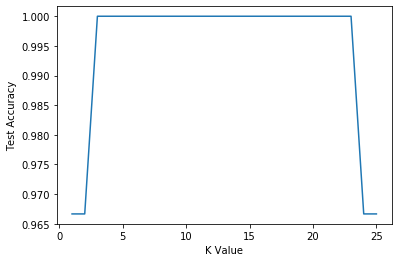

In [36]:
plt.plot(k_range, acc_arr)
plt.xlabel("K Value")
plt.ylabel("Test Accuracy")

In [38]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [39]:
classes = {0:'sentosa', 1: 'versicolor', 2: 'viriginica'}

In [40]:
x_new = [[3,4,5,2],
        [5,4,2,2]]
y_predict = knn.predict(x_new)

print(classes[y_predict[0]])
print(classes[y_predict[1]])

versicolor
sentosa
